# Assignment 1: PyTorch Introduction

In this assignment, you will start off by constructing a neural networks from scratch to get a stronger understanding of what is required to make neural networks work. Then in the second part of the assignment you will train a neural network (using PyTorch) to classify an image into one of two classes: "car" or "truck". The code for the neural networks
you train will be written for you, and you are not (yet!) expected
to understand all provided code. However, by the end of the assignment,
you should be able to:

1. Understand at a high level the training loop for a machine learning model.
2. Understand the distinction between training, validation, and test data.
3. The concepts of overfitting and underfitting.
4. Investigate how different hyperparameters, such as learning rate and batch size, affect the success of training.
5. Compare an ANN (aka Multi-Layer Perceptron) with a CNN.

*This assignment is based on an assignment developed by Prof. Lisa Zhang.*

### What to submit

Submit an HTML file containing all your code, outputs, and write-up
from parts A and B. Please take extra effort to make your answers and submissions readable. Do not display unnecessary outputs, only the ones that are important for supporting your answers.

You can produce a HTML file directly from Google Colab. The Colab instructions are provided at the end of this document.

**Do not submit any other files produced by your code.**

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission.

## Colab Link

Include a link to your colab file here and ensure the file can be accessed by the our teaching team.

Colab Link:

In [ ]:
# TO BE COMPLETED

http://

#PART A: Constructing a Neural Network [8pt]

Before we get into using PyTorch to train our classifier we will go through the process of creating our neural network from scratch. We've seen in the tutorial how to build a 1-layer network, now we'll take it one step further to build a 2-layer network. This is an important exercise that everyone should attempt at least once to understand and truly appreciate the workings of neural networks.

## Helper Functions

To help guide the construction we will use the iris dataset that was introduced in the tutorial. Provided are some helper code to get us started:

In [1]:
# load "Iris_3class.csv" to Google Colab
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [2]:
import pandas as pd
import numpy as np

raw_data = pd.read_csv("Iris_3class.csv", header = None)
raw_data = raw_data.values
np.random.shuffle(raw_data)

In [4]:
import numpy as np
# raw_data = raw_data.values

# split your data into training and validation
X_train = raw_data[0:100,:4]
y_train = raw_data[0:100,4:5].astype(int)
X_val = raw_data[100:,:4]
y_val = raw_data[100:,4:5].astype(int)

print(X_train.shape, y_train.shape)
print(X_train.dtype, y_train.dtype)
print(X_val.shape, y_val.shape)
print(X_val.dtype, y_val.dtype)

(100, 4) (100, 1)
float64 int64
(50, 4) (50, 1)
float64 int64


Recall that the neural network output consists of several nodes, one for each output class. Since the labels are provided as integers we will need to convert them into one-hot vectors to match the neural network output format.

In [5]:
#Convert array to one-hot encoding
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

In [6]:
y_train = to_one_hot(y_train)
print(X_train.shape, y_train.shape)
print(X_train.dtype, y_train.dtype)

y_val = to_one_hot(y_val)
print(X_val.shape, y_val.shape)
print(X_val.dtype, y_val.dtype)

(100, 4) (100, 3)
float64 float64
(50, 4) (50, 3)
float64 float64


In [7]:
#verify one-hot encoding
y_train[0:5,:]

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

## Part 1. Develop a 2-layer ANN [6pt MODEL]
At its core a 2-layer neural network is just a few lines of code. Most of the complexity comes from setting up the training of the network.

Using vectorized form, set up the neural network training to use a cross-entropy loss function and determine the gradients with resepect to the layer 1 and layer 2 weights.

In [49]:
# write code to create a 2-layer ANN in vectorized form

#define sigmoid
def sigmoid(x):
    return 1/(1+np.exp(-x))

#define softmax
def softmax(x):
    
    e = np.exp(x)
    return e/e.sum(axis=1, keepdims = True)


def ann(W, X_train, y_train):

    num_hidden = 5
    num_features = 4
    num_outputs = 3

  #Weights
    w0 = W[:20].reshape(num_features, num_hidden)
    w1 = W[20:].reshape(num_hidden, num_outputs)

  #Feed forward
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = np.dot(layer1, w1)

  # softmax
    output = softmax(layer2)

  #Back propagation using gradient descent

  #cross-entropy loss
  # TO BE COMPLETED
    error = np.sum(-1 * y_train * np.log(output))

  #initialize gradients to zero
    dw0 = np.zeros((num_features, num_hidden))
    dw1 = np.zeros((num_hidden, num_outputs))

  #calculate gradients
  # TO BE COMPLETED
    dL_du_hat = output - y_train #dL_dyhat
    dw1 = np.dot(layer1.T, dL_du_hat)
    
    d_layer1 = np.dot(dL_du_hat, w1.T)
    d_layer1_output = d_layer1 * layer1 * (1 - layer1)
    dw0 = np.dot(X_train.T, d_layer1_output)
    
    
    
    
#   du_hat_du = output*(1-output)
#   du_dv_hat = w1.T
#   dv_hat_dv = layer1*(1-layer1)
#   dv_dw0 = X_train
#   du_dw1 = layer1


#     dL_du_hat = output-y_train
#     du_hat_du = output*(1-output)
#     du_dv_hat = w1.T
#     dv_hat_dv = layer1*(1-layer1)
#     dv_dw0 = X_train
#     du_dw1 = layer1


  #determine gradients
  # TO BE COMPLETED
#     dw1 += du_dw1.T.dot(dL_du_hat*du_hat_du)
#     dw0 += dv_dw0.T.dot((dL_du_hat*du_hat_du).dot(du_dv_hat)*(dv_hat_dv))

  #combine gradients into one vector
    dW = np.array(list(dw0.flatten()) + list(dw1.flatten()))


    return (error, dW, output)


## Part 2. Train your neural network [2pt RESULT]
How well does your network work on the iris dataset?

In [50]:
num_hidden = 5
num_features = 4
num_outputs = 3

#initialize weights
w0 = 2*np.random.random((num_features, num_hidden)) - 1
w1 = 2*np.random.random((num_hidden, num_outputs)) - 1

#combine weights into a single vector
W = np.array(list(w0.flatten()) + list(w1.flatten()))

#train network
n = 0.001
iterations = 100000
errors = []
for i in range(iterations):
  (error, dW, y_pred) = ann(W, X_train, y_train)
  W += -dW * n
  errors.append(error)
print(errors[-1])

5.745348598899361


In [51]:
errors

[123.75250154646542,
 116.30776845649532,
 112.48660384502206,
 110.46648165068709,
 109.23439982152982,
 108.38543034961819,
 107.74340402313484,
 107.21996174594302,
 106.76536893135128,
 106.34923954124638,
 105.95201226794885,
 105.56078488745905,
 105.16709635056903,
 104.76563631472754,
 104.35341121364786,
 103.92914565822423,
 103.49282570146383,
 103.04535332186771,
 102.58829926492334,
 102.12373097969413,
 101.65407605521652,
 101.18197907171611,
 100.71012766222995,
 100.24105307867521,
 99.77693560549247,
 99.31945345360819,
 98.86970347494965,
 98.42820104327609,
 97.99494602545914,
 97.5695298745884,
 97.15125726773086,
 96.73926137786654,
 96.33260030844532,
 95.93032994663929,
 95.53155387501445,
 95.13545386952501,
 94.74130549615822,
 94.34848314933896,
 93.956458164139,
 93.56479277662106,
 93.17313191119976,
 92.78119412460654,
 92.38876254664318,
 91.99567630970013,
 91.60182272276981,
 91.20713029247642,
 90.81156259918687,
 90.4151129818631,
 90.01779995731874,


In [52]:
#examine predictions on training data
(_, _, y_pred) = ann(W, X_train, y_train)
pred = np.round(y_pred, 0)
pred[:5]

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [53]:
#examine ground truth training data
train = np.round(y_train, 0)
train[:5]

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [54]:
'''
PROVIDE YOUR ANSWER BELOW

The accuracy on training dataset is 99%

'''
acc=0
for i in range(len(pred)):
    if pred[i][0]==train[i][0] and pred[i][1]==train[i][1]: # same prediction
        acc+=1
print("Training accuracy of neural network:", acc/len(pred))

Training accuracy of neural network: 0.99


## Part 3. Validation [2pt MODEL]
Validate that the gradients were computed correctly for the 2-layer neural network you developed.

In [58]:
#write code to numerical verify the gradients you calculated

num_hidden = 5
num_features = 4
num_outputs = 3

#initialize weights
w0 = 2*np.random.random((num_features, num_hidden)) - 1
w1 = 2*np.random.random((num_hidden, num_outputs)) - 1

#combine weights
# TO BE COMPLETED
W = np.array(list(w0.flatten()) + list(w1.flatten()))

#compute gradients analytically
(error, dW, y_pred) = ann(W, X_train, y_train)

#compute gradients numerically
dW_num = np.zeros((len(W),1))

for ind in range(len(W)):
  #reset gradients
  We1 = np.array(list(w0.flatten()) + list(w1.flatten()))
  We2 = np.array(list(w0.flatten()) + list(w1.flatten()))

  #increment slightly
    # TO BE COMPLETED
  learning_rate = 0.001
  We1[ind] += learning_rate * We1[ind]
  We2[ind] -= learning_rate * We2[ind] 
    

  #compute errors
  (error_e1, dW_e1, y_pred1) = ann(We1, X_train, y_train)
  (error_e2, dW_e2, y_pred2) = ann(We2, X_train, y_train)

  #obtain numerical gradients
  grad_num = (error_e1 - error_e2) / (2 * learning_rate * We1[ind])

  #display difference between numerical and analytic gradients
  print(round(abs(grad_num - dW[ind]), 4), grad_num, dW[ind])


0.001 0.9961476062568955 0.9971422546268756
0.0 0.027415267283604702 0.027442044323516754
0.0047 4.694511110772711 4.699193759643683
0.0156 15.572149170789757 15.587729318578058
0.0016 -1.6054282786970306 -1.6070311657095249
0.0003 0.2540769668216304 0.2543311250526668
0.0001 -0.14024943409159268 -0.14038937529985324
0.0028 2.759486733341022 2.762246144543885
0.0128 12.825236920489134 12.838062962594629
0.0011 -1.130870696257909 -1.1320014479766278
0.0011 1.0840420436804523 1.0851259851763
0.0004 0.355831319891412 0.35618563825471
0.002 1.9713167717799338 1.9732881376955935
0.0003 0.32253672936743694 0.32285999018335465
0.0004 -0.35930245657109905 -0.35966178462680576
0.0004 0.3595683600686737 0.35992791786657014
0.0001 0.14933288436296852 0.14948214622546627
0.0004 0.3908527694252659 0.3912436651057846
0.0009 -0.9499142766637976 -0.9508641856105091
0.0 -0.027317332336779097 -0.027344660683493234
0.0002 -0.20308611271024368 -0.20328919884781574
0.0005 -0.459229125539976 -0.459688354642

# PART B: Cars vs Trucks [30Pt]

In the second part of the assignment we will see how we can use PyTorch to train a neural network to identify Cars and Trucks.

In [5]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms


## Part 0. Helper Functions

We will be making use of the following helper functions. You will be asked to look
at and possibly modify some of these, but you are not expected to understand all of them.

You should look at the function names and read the docstrings. If you are curious, come back and explore the code *after* making some progress on the lab.

In [1]:
###############################################################################
# Data Loading

def get_relevant_indices(dataset, classes, target_classes):
    """ Return the indices for datapoints in the dataset that belongs to the
    desired target classes, a subset of all possible classes.

    Args:
        dataset: Dataset object
        classes: A list of strings denoting the name of each class
        target_classes: A list of strings denoting the name of desired classes
                        Should be a subset of the 'classes'
    Returns:
        indices: list of indices that have labels corresponding to one of the
                 target classes
    """
    indices = []
    for i in range(len(dataset)):
        # Check if the label is in the target classes
        label_index = dataset[i][1] # ex: 9
        label_class = classes[label_index] # ex: 'truck'
        if label_class in target_classes:
            indices.append(i)
    return indices

def get_data_loader(target_classes, batch_size):
    """ Loads images of cars and trucks, splits the data into training, validation
    and testing datasets. Returns data loaders for the three preprocessed datasets.

    Args:
        target_classes: A list of strings denoting the name of the desired
                        classes. Should be a subset of the argument 'classes'
        batch_size: A int representing the number of samples per batch

    Returns:
        train_loader: iterable training dataset organized according to batch size
        val_loader: iterable validation dataset organized according to batch size
        test_loader: iterable testing dataset organized according to batch size
        classes: A list of strings denoting the name of each class
    """

    classes = ('plane', 'car', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    ########################################################################
    # The output of torchvision datasets are PILImage images of range [0, 1].
    # We transform them to Tensors of normalized range [-1, 1].
    transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    # Load CIFAR10 training data
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    # Get the list of indices to sample from
    relevant_indices = get_relevant_indices(trainset, classes, target_classes)

    # Split into train and validation
    np.random.seed(1000) # Fixed numpy random seed for reproducible shuffling
    np.random.shuffle(relevant_indices)
    split = int(len(relevant_indices) * 0.8) #split at 80%

    # split into training and validation indices
    relevant_train_indices, relevant_val_indices = relevant_indices[:split], relevant_indices[split:]
    train_sampler = SubsetRandomSampler(relevant_train_indices)
    train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                               num_workers=1, sampler=train_sampler)
    val_sampler = SubsetRandomSampler(relevant_val_indices)
    val_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                              num_workers=1, sampler=val_sampler)
    # Load CIFAR10 testing data
    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transform)
    # Get the list of indices to sample from
    relevant_test_indices = get_relevant_indices(testset, classes, target_classes)
    test_sampler = SubsetRandomSampler(relevant_test_indices)
    test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                             num_workers=1, sampler=test_sampler)
    return train_loader, val_loader, test_loader, classes

###############################################################################
# Training
def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path

def normalize_label(labels):
    """
    Given a tensor containing 2 possible values, normalize this to 0/1

    Args:
        labels: a 1D tensor containing two possible scalar values
    Returns:
        A tensor normalize to 0/1 value
    """
    max_val = torch.max(labels)
    min_val = torch.min(labels)
    norm_labels = (labels - min_val)/(max_val - min_val)
    return norm_labels

def evaluate(net, loader, criterion):
    """ Evaluate the network on the validation set.

     Args:
         net: PyTorch neural network object
         loader: PyTorch data loader for the validation set
         criterion: The loss function
     Returns:
         err: A scalar for the avg classification error over the validation set
         loss: A scalar for the average loss function over the validation set
     """
    total_loss = 0.0
    total_err = 0.0
    total_epoch = 0
    for i, data in enumerate(loader, 0):
        inputs, labels = data
        labels = normalize_label(labels)  # Convert labels to 0/1
        outputs = net(inputs)
        loss = criterion(outputs, labels.float())
        corr = (outputs > 0.0).squeeze().long() != labels
        total_err += int(corr.sum())
        total_loss += loss.item()
        total_epoch += len(labels)
    err = float(total_err) / total_epoch
    loss = float(total_loss) / (i + 1)
    return err, loss

###############################################################################
# Training Curve
def plot_training_curve(path):
    """ Plots the training curve for a model run, given the csv files
    containing the train/validation error/loss.

    Args:
        path: The base path of the csv files produced during training
    """
    import matplotlib.pyplot as plt
    train_err = np.loadtxt("{}_train_err.csv".format(path))
    val_err = np.loadtxt("{}_val_err.csv".format(path))
    train_loss = np.loadtxt("{}_train_loss.csv".format(path))
    val_loss = np.loadtxt("{}_val_loss.csv".format(path))
    plt.title("Train vs Validation Error")
    n = len(train_err) # number of epochs
    plt.plot(range(1,n+1), train_err, label="Train")
    plt.plot(range(1,n+1), val_err, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend(loc='best')
    plt.show()
    plt.title("Train vs Validation Loss")
    plt.plot(range(1,n+1), train_loss, label="Train")
    plt.plot(range(1,n+1), val_loss, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

## Part 1. Visualizing the Data

We will make use of some of the CIFAR-10 data set, which consists of
colour images of size 32x32 pixels belonging to 10 categories. You can
find out more about the dataset at https://www.cs.toronto.edu/~kriz/cifar.html

For this assignment, we will only be using the car and truck categories.
We have included code that automatically downloads the dataset the
first time that the main script is run.

In [62]:
# This will download the CIFAR-10 dataset to a folder called "data"
# the first time you run this code.
train_loader, val_loader, test_loader, classes = get_data_loader(
    target_classes=["car", "truck"],
    batch_size=1) # One image per batch

100%|███████████████████████| 170498071/170498071 [00:02<00:00, 71384730.90it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


### Part (i) [0.5pt EXPLORATORY]

Visualize some of the data by running the code below.
Include the visualization in your writeup.

(You don't need to submit anything else.)

tensor([9])
tensor([1])
tensor([9])
tensor([1])
tensor([1])
tensor([9])
tensor([9])
tensor([9])
tensor([9])
tensor([1])
tensor([9])
tensor([1])
tensor([9])
tensor([1])
tensor([1])


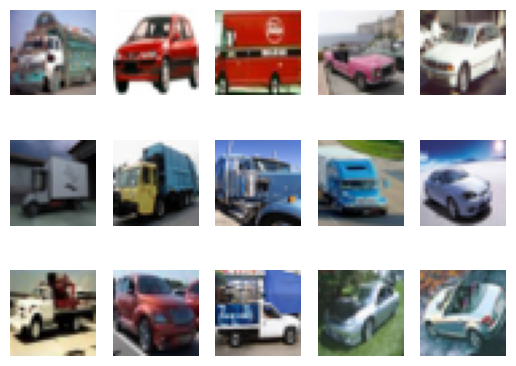

In [65]:
import matplotlib.pyplot as plt

k = 0
for images, labels in train_loader:
    print(labels)
    # since batch_size = 1, there is only 1 image in `images`
    image = images[0]
    # place the colour channel at the end, instead of at the beginning
    img = np.transpose(image, [1,2,0])
    # normalize pixel intensity values to [0, 1]
    img = img / 2 + 0.5
    plt.subplot(3, 5, k+1)
    plt.axis('off')
    plt.imshow(img)

    k += 1
    if k > 14:
        break

In [66]:
'''
PROVIDE YOUR ANSWER BELOW

From the above images, there are 6 cars and 8 trucks, we may assume that the dataset is balanced

'''

'\nPROVIDE YOUR ANSWER BELOW\n\nFrom the above images, there are 6 cars and 8 trucks, we may assume that the dataset is balanced\n\n\n\n\n'

### Part (ii) [1pt EXPLORATORY]

How many training examples do we have for the combined `car` and `truck` classes?
What about validation examples?
What about test examples?

In [71]:
# TO BE COMPLETED

print("Number of training examples:", len(train_loader))
print("Number of validation examples:", len(val_loader))
print("Number of test examples:", len(test_loader))


Number of training examples: 8000
Number of validation examples: 2000
Number of test examples: 2000


In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

Number of training examples: 8000
Number of validation examples: 2000
Number of test examples: 2000


'''

## Part 2. Training

We define two neural networks, a `LargeNet` and `SmallNet`.
We'll be training the networks in this section.

You won't understand fully what these networks are doing until
the next few classes, and that's okay. For this assignment, please
focus on learning how to train networks, and how hyperparameters affect
training.

In [12]:
class LargeNet(nn.Module):
    def __init__(self):
        super(LargeNet, self).__init__()
        self.name = "large"
        self.conv1 = nn.Conv2d(3, 5, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(5, 10, 5)
        self.fc1 = nn.Linear(10 * 5 * 5, 32)
        self.fc2 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 10 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

In [13]:
class SmallNet(nn.Module):
    def __init__(self):
        super(SmallNet, self).__init__()
        self.name = "small"
        self.conv = nn.Conv2d(3, 5, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(5 * 7 * 7, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv(x)))
        x = self.pool(x)
        x = x.view(-1, 5 * 7 * 7)
        x = self.fc(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

In [14]:
small_net = SmallNet()
large_net = LargeNet()

### Part (i) [1pt EXPLORATORY]

The methods `small_net.parameters()` and `large_net.parameters()`
produces an iterator of all the trainable parameters of the network.
These parameters are torch tensors containing many scalar values.

We haven't learned how how the parameters in these high-dimensional
tensors will be used, but we should be able to count the number
of parameters. Measuring the number of parameters in a network is
one way of measuring the "size" of a network.

What is the total number of parameters in `small_net` and in
`large_net`? (Hint: how many numbers are in each tensor?)

In [75]:
for param in small_net.parameters():
    print(param.shape)

torch.Size([5, 3, 3, 3])
torch.Size([5])
torch.Size([1, 245])
torch.Size([1])


In [79]:
# TO BE COMPLETED
para_small = 0
for p in small_net.parameters():
    para_small+=p.numel()
print("Total number of parameters in small_net:",para_small)

para_large = 0
for p in large_net.parameters():
    para_large+=p.numel()
print("Total number of parameters in large_net:",para_large)

Total number of parameters in small_net: 386
Total number of parameters in large_net: 9705


In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

Total number of parameters in small_net: 386
Total number of parameters in large_net: 9705

'''

### The function train_net

The function `train_net` below takes an untrained neural network (like `small_net` and `large_net`) and
several other parameters. You should be able to understand how this function works.
The figure below shows the high level training loop for a machine learning model:

![alt text](https://github.com/UTNeural/Lab2/blob/master/Diagram.png?raw=true)

In [17]:
def train_net(net, batch_size=64, learning_rate=0.01, num_epochs=30):
    ########################################################################
    # Train a classifier on cars vs trucks
    target_classes = ["car", "truck"]
    ########################################################################
    # Fixed PyTorch random seed for reproducible result
    torch.manual_seed(1000)
    ########################################################################
    # Obtain the PyTorch data loader objects to load batches of the datasets
    train_loader, val_loader, test_loader, classes = get_data_loader(
            target_classes, batch_size)
    ########################################################################
    # Define the Loss function and optimizer
    # The loss function will be Binary Cross Entropy (BCE). In this case we
    # will use the BCEWithLogitsLoss which takes unnormalized output from
    # the neural network and scalar label.
    # Optimizer will be SGD with Momentum.
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
    ########################################################################
    # Set up some numpy arrays to store the training/test loss/erruracy
    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)
    ########################################################################
    # Train the network
    # Loop over the data iterator and sample a new batch of training data
    # Get the output from the network, and optimize our loss function.
    start_time = time.time()
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        total_train_loss = 0.0
        total_train_err = 0.0
        total_epoch = 0
        for i, data in enumerate(train_loader, 0):
            # Get the inputs
            inputs, labels = data
            labels = normalize_label(labels) # Convert labels to 0/1
            # Zero the parameter gradients
            optimizer.zero_grad()
            # Forward pass, backward pass, and optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels.float())
            loss.backward()
            optimizer.step()
            # Calculate the statistics
            corr = (outputs > 0.0).squeeze().long() != labels
            total_train_err += int(corr.sum())
            total_train_loss += loss.item()
            total_epoch += len(labels)
        train_err[epoch] = float(total_train_err) / total_epoch
        train_loss[epoch] = float(total_train_loss) / (i+1)
        val_err[epoch], val_loss[epoch] = evaluate(net, val_loader, criterion)
        print(("Epoch {}: Train err: {}, Train loss: {} |"+
               "Validation err: {}, Validation loss: {}").format(
                   epoch + 1,
                   train_err[epoch],
                   train_loss[epoch],
                   val_err[epoch],
                   val_loss[epoch]))
        # Save the current model (checkpoint) to a file
        model_path = get_model_name(net.name, batch_size, learning_rate, epoch)
        torch.save(net.state_dict(), model_path)
    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))
    # Write the train/test loss/err into CSV file for plotting later
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt("{}_train_err.csv".format(model_path), train_err)
    np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
    np.savetxt("{}_val_err.csv".format(model_path), val_err)
    np.savetxt("{}_val_loss.csv".format(model_path), val_loss)

### Part (ii) [0.5pt EXPLORATORY]

The parameters to the function `train_net` are hyperparameters of our neural network.
We made these hyperparameters easy to modify so that we can tune them later on.

What are the default values of the parameters `batch_size`, `learning_rate`,
and `num_epochs`?

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

From the initiation of the function train_net, the default values are given by:

batch_size=64, learning_rate=0.01, num_epochs=30



'''

### Part (iii) [0.5pt EXPLORATORY]
What files are written to disk when we call `train_net` with `small_net`, and train for 5 epochs? Provide a list
of all the files written to disk, and what information the files contain.

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

For each epoch, a checkpoint with epoch is saved to the disk, if there are 5 epochs, the files saved:

model_small_bs64_lr0.01_epoch0
model_small_bs64_lr0.01_epoch1
model_small_bs64_lr0.01_epoch2
model_small_bs64_lr0.01_epoch3
model_small_bs64_lr0.01_epoch4

Additionally, 5 CSV files are written containing training and validation error and loss for every epoch

model_small_bs64_lr0.01_epoch4_train_err.csv
model_small_bs64_lr0.01_epoch4_train_loss.csv
model_small_bs64_lr0.01_epoch4_val_err.csv
model_small_bs64_lr0.01_epoch4_val_loss.csv

'''

### Part (iv) [0.5pt EXPLORATORY]
Train both `small_net` and `large_net` using the function `train_net` and its default parameters.
The function will write many files to disk, including a model checkpoint (saved values of model weights)
at the end of each epoch.

If you are using Google Colab, you will need to mount Google Drive
so that the files generated by `train_net` gets saved. We will be using
these files in the parts that follow.
(See the Google Colab tutorial for more information about this.)

Report the total time elapsed when training each network. Which network took longer to train?
Why?

In [ ]:
# Since the function writes files to disk, you will need to mount
# your Google Drive. If you are working on the assignment locally, you
# can comment out this code.

# from google.colab import drive
# drive.mount('/content/gdrive')

In [81]:
# TO BE COMPLETED

# train small net
train_net(small_net)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.37475, Train loss: 0.6364940505027771 |Validation err: 0.3385, Validation loss: 0.606323211453855
Epoch 2: Train err: 0.284375, Train loss: 0.5633207151889801 |Validation err: 0.276, Validation loss: 0.5425982726737857
Epoch 3: Train err: 0.2445, Train loss: 0.5141647062301635 |Validation err: 0.241, Validation loss: 0.5042619379237294
Epoch 4: Train err: 0.236125, Train loss: 0.48906661891937253 |Validation err: 0.2385, Validation loss: 0.4907175535336137
Epoch 5: Train err: 0.2155, Train loss: 0.4585821046829224 |Validation err: 0.2205, Validation loss: 0.45790216978639364
Epoch 6: Train err: 0.202875, Train loss: 0.44896930813789365 |Validation err: 0.2395, Validation loss: 0.48114048689603806
Epoch 7: Train err: 0.198625, Train loss: 0.43389333987236023 |Validation err: 0.1985, Validation loss: 0.4321664469316602
Epoch 8: Train err: 0.18375, Train loss: 0.4142409293651581 |Validation e

In [82]:
# train large net
train_net(large_net)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.410875, Train loss: 0.6708380379676819 |Validation err: 0.3605, Validation loss: 0.6560872960835695
Epoch 2: Train err: 0.333875, Train loss: 0.6137111897468567 |Validation err: 0.3265, Validation loss: 0.6037190835922956
Epoch 3: Train err: 0.289875, Train loss: 0.5684573364257812 |Validation err: 0.2735, Validation loss: 0.5575842056423426
Epoch 4: Train err: 0.258625, Train loss: 0.5268473362922669 |Validation err: 0.2375, Validation loss: 0.49610982928425074
Epoch 5: Train err: 0.224, Train loss: 0.4805912277698517 |Validation err: 0.2085, Validation loss: 0.4448517318814993
Epoch 6: Train err: 0.208625, Train loss: 0.444765310049057 |Validation err: 0.1995, Validation loss: 0.43543929141014814
Epoch 7: Train err: 0.16975, Train loss: 0.389151171207428 |Validation err: 0.1705, Validation loss: 0.3913947087712586
Epoch 8: Train err: 0.154375, Train loss: 0.36341585087776185 |Validation 

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

From the output below, we can see that the training error is continuing decreasing for the first 11 epochs.
Train loss, validation error and validation loss are also decreasing for the first 10 epochs, but they experience
some bounces, they may go up for one epoch and continue to decrease afterwards.

It takes 486.85 seconds to train small net, 517.79 seconds to train large net, large net takes longer to train.

The reason why large net takes longer can be shown by the structure of the network: large net has more layers 
and output channels, which brings a higher computational complexity.

'''

### Part (v) [0.5pt EXPLORATORY]
Use the function `plot_training_curve` to display the trajectory of the
training/validation error and the training/validation loss.
You will need to use the function `get_model_name` to generate the
argument to the `plot_training_curve` function.

Do this for both the small network and the large network. Include both plots
in your writeup.

In [ ]:
#model_path = get_model_name("small", batch_size=??, learning_rate=??, epoch=29)

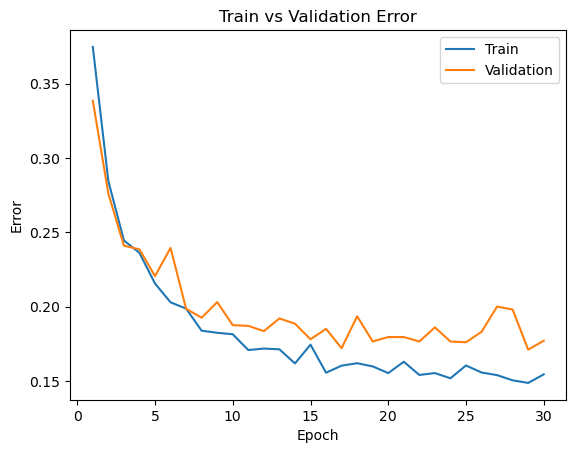

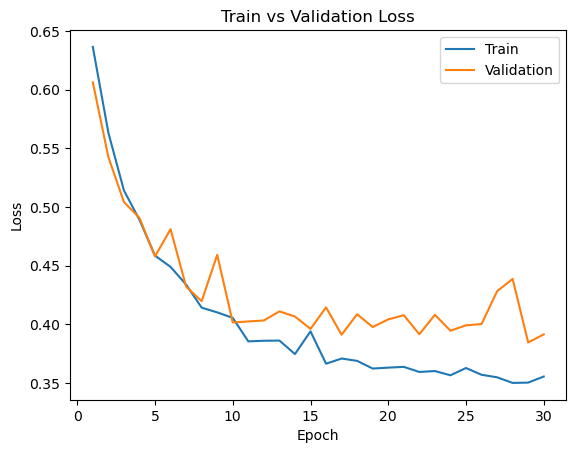

In [83]:
# TO BE COMPLETED

model_path = get_model_name("small", batch_size=64, learning_rate=.01, epoch=29)

plot_training_curve(model_path)

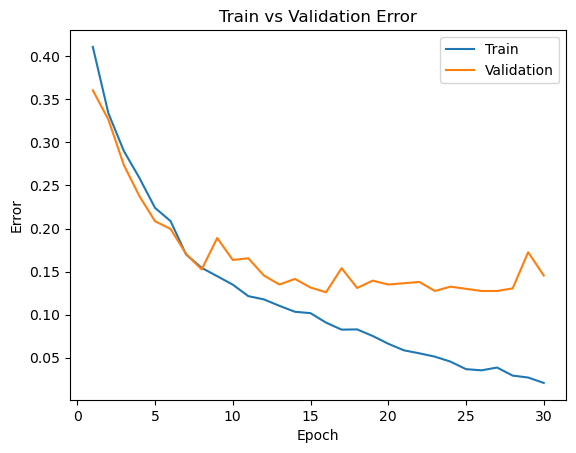

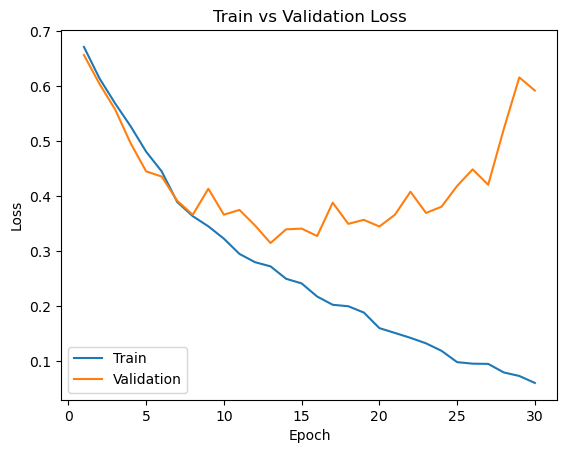

In [85]:
model_path = get_model_name("large", batch_size=64, learning_rate=.01, epoch=29)

plot_training_curve(model_path)

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

The above four plots shows training vs validation error and losses for small and large networks.

'''

### Part (vi) [0.5pt EXPLORATORY]
Describe what you notice about the training curve.
How do the curves differ for `small_net` and `large_net`?
Identify any occurences of underfitting and overfitting.

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

For both small and large net, training errors continue to decrease, while the trend of decreasing gets 
smaller and smaller. 
Regards validation errors and losses, both small and large nets reaches there elbow points
at about epoch 15. 
While large net validation loss tends to go up after epoch 15, which indicates overfitting 
of the large net model.

'''

## Part 3. Optimization Parameters

For this section, we will work with `large_net` only.

### Part (i) [0.5pt EXPLORATORY]
Train `large_net` with all default parameters, except set `learning_rate=0.001`.
Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *lowering* the learning rate.

In [90]:
# Note: When we re-construct the model, we start the training
# with *random weights*. If we omit this code, the values of
# the weights will still be the previously trained values.
large_net = LargeNet()

In [91]:
# TO BE COMPLETED
train_net(large_net, learning_rate=0.001)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.49325, Train loss: 0.6929468927383423 |Validation err: 0.442, Validation loss: 0.6914906576275826
Epoch 2: Train err: 0.439125, Train loss: 0.6903668093681335 |Validation err: 0.411, Validation loss: 0.6890159901231527
Epoch 3: Train err: 0.41225, Train loss: 0.6873623018264771 |Validation err: 0.3835, Validation loss: 0.6853493861854076
Epoch 4: Train err: 0.380875, Train loss: 0.6822642579078674 |Validation err: 0.3875, Validation loss: 0.6789211388677359
Epoch 5: Train err: 0.38425, Train loss: 0.6731501016616821 |Validation err: 0.3695, Validation loss: 0.667275458574295
Epoch 6: Train err: 0.367, Train loss: 0.6568300957679749 |Validation err: 0.368, Validation loss: 0.6502018719911575
Epoch 7: Train err: 0.36125, Train loss: 0.6393863153457642 |Validation err: 0.355, Validation loss: 0.6413879916071892
Epoch 8: Train err: 0.351875, Train loss: 0.6293846802711487 |Validation err: 0.36

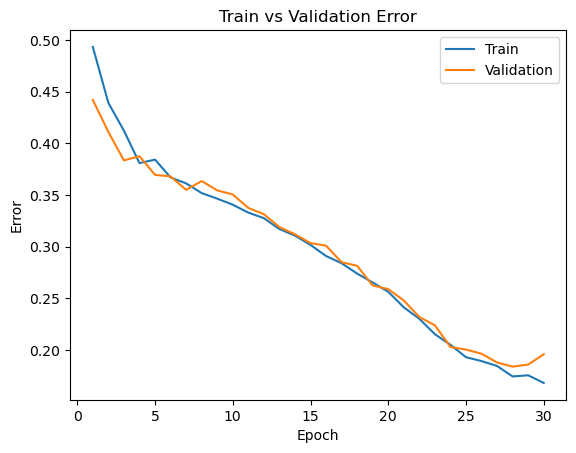

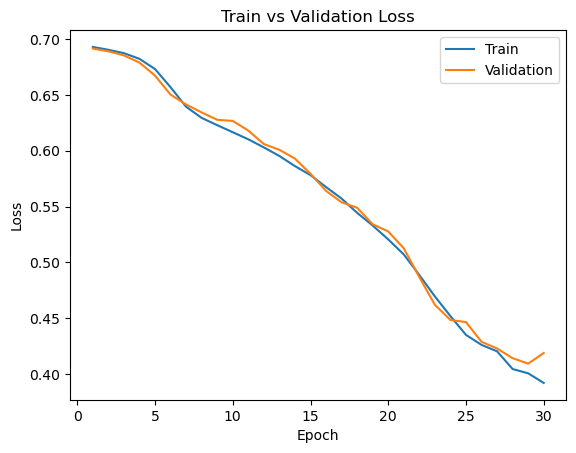

In [92]:
model_path = get_model_name("large", batch_size=64, learning_rate=.001, epoch=29)

plot_training_curve(model_path)

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

The training process takes 518.07 seconds, compared with previous 517.79 seconds, lowering learing rate does not 
change training time.

We can observe that the validation losses and errors reaches the minimum at about epoch 28, compared to lr=0.01, 
losses and errors reaches minimum at about epoch 15.

By lowering learing rate, there's a significant decrease on the speed of lowering losses and errors, we may say 
the speed of convergence decreased.

Additionally, we see less bounces on the errors and losses, which means that the values are less likely to 
go up and down, because a high learning rate may lead to overshotting when finding optimal value,
so with a lower learing rate, our training process is more stable.


There's no signs of overfitting when we lower learning rate to 0.001.

'''

### Part (ii) [0.5pt EXPLORATORY]
Train `large_net` with all default parameters, except set `learning_rate=0.1`.
Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *increasing* the learning rate.

In [93]:
# TO BE COMPLETED
large_net = LargeNet()
train_net(large_net, learning_rate=0.1)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.344375, Train loss: 0.6167175190448762 |Validation err: 0.3055, Validation loss: 0.5716420309618115
Epoch 2: Train err: 0.24825, Train loss: 0.5240185317993165 |Validation err: 0.2095, Validation loss: 0.45482188928872347
Epoch 3: Train err: 0.211875, Train loss: 0.4600547761917114 |Validation err: 0.2095, Validation loss: 0.4640376288443804
Epoch 4: Train err: 0.182375, Train loss: 0.4166514735221863 |Validation err: 0.17, Validation loss: 0.4151669619604945
Epoch 5: Train err: 0.167625, Train loss: 0.3844143135547638 |Validation err: 0.194, Validation loss: 0.44523428240790963
Epoch 6: Train err: 0.18225, Train loss: 0.41128539621829985 |Validation err: 0.213, Validation loss: 0.4706113673746586
Epoch 7: Train err: 0.169875, Train loss: 0.3833605078458786 |Validation err: 0.2095, Validation loss: 0.4557598251849413
Epoch 8: Train err: 0.169375, Train loss: 0.38713446307182314 |Validation

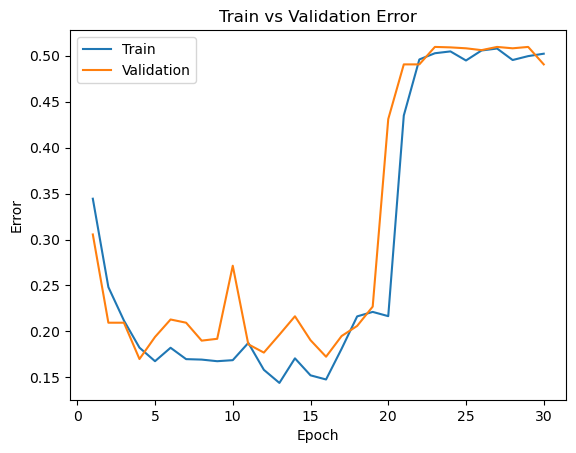

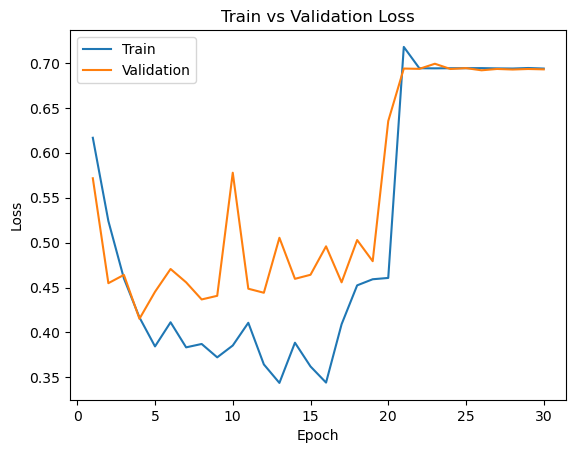

In [97]:
model_path = get_model_name("large", batch_size=64, learning_rate=.1, epoch=29)
plot_training_curve(model_path)

In [ ]:
'''

The training process takes 517.57 seconds, compared with previous 517.79 and 518.07 seconds, 
changing learing rate does not change training time.

We can observe that the validation losses and errors reaches the minimum at about epoch 4, 
compared with the previous:
model with lr=0.001 reaches mimimum at about epoch 28, model with lr=0.01, reaches minimum at about epoch 15.

By increasing learing rate, there's a significant increase on the speed of lowering losses and errors, 
compared with prevous models with 0.01 and 0.001 learning rate, we may say the speed of convergence increased.

Additionally, the training process is very unstable, a high learning rate leads to 
overshotting when finding optimal value, we see many bounces on the errors and losses.

'''

### Part (iii) [0.5pt EXPLORATORY]

Train `large_net` with all default parameters, including with `learning_rate=0.01`.
Now, set `batch_size=512`. Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *increasing* the batch size.

In [98]:
# TO BE COMPLETED
large_net = LargeNet()
train_net(large_net, batch_size=512)


Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.502375, Train loss: 0.6957774236798286 |Validation err: 0.4905, Validation loss: 0.6931759715080261
Epoch 2: Train err: 0.502375, Train loss: 0.6933846436440945 |Validation err: 0.4905, Validation loss: 0.6919614970684052
Epoch 3: Train err: 0.501375, Train loss: 0.6917640753090382 |Validation err: 0.482, Validation loss: 0.6910021603107452
Epoch 4: Train err: 0.454125, Train loss: 0.6902752816677094 |Validation err: 0.4285, Validation loss: 0.6896679252386093
Epoch 5: Train err: 0.420875, Train loss: 0.6881278455257416 |Validation err: 0.429, Validation loss: 0.687335267663002
Epoch 6: Train err: 0.4135, Train loss: 0.6849403902888298 |Validation err: 0.422, Validation loss: 0.6839607954025269
Epoch 7: Train err: 0.408375, Train loss: 0.6799686327576637 |Validation err: 0.411, Validation loss: 0.6784868836402893
Epoch 8: Train err: 0.39225, Train loss: 0.6726948395371437 |Validation err: 

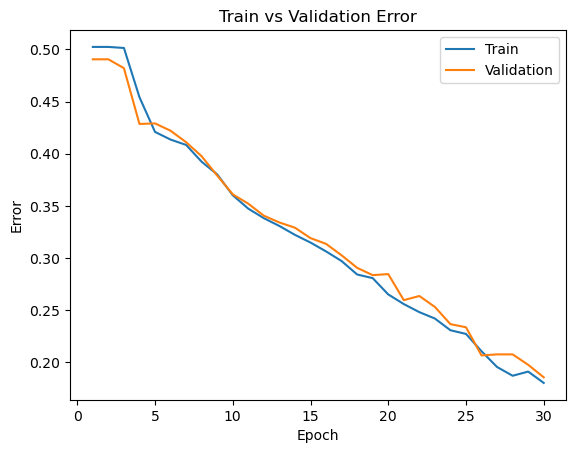

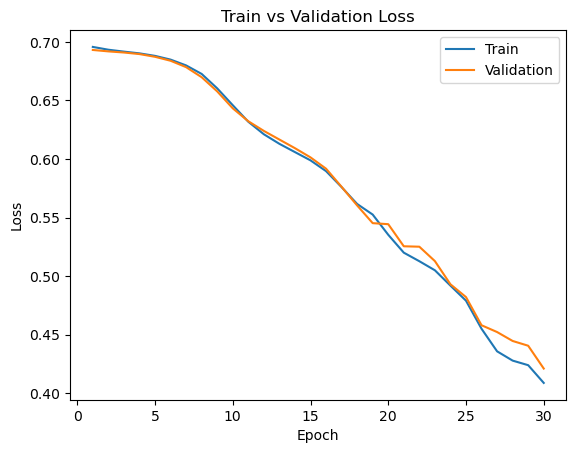

In [100]:
model_path = get_model_name("large", batch_size=512, learning_rate=.01, epoch=29)
plot_training_curve(model_path)

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

The training process takes 481.59 seconds, compared with previous 517.79, 518.07, 517.57 seconds, 
increasing batch size decreases training time.

We can observe that the lowest validation losses and errors is at epoch 30, which indicates 
that we may need more epoch here to reaches optimal values.
The model with defaut batch size of 64 and lr=0.01, losses and errors reaches minimum at about epoch 15.

By increasing batch size, there's a significant decrease on the speed of lowering losses and errors, we may say 
the speed of convergence decreased.

Additionally, we see less bounces on the errors and losses, because the model with higher batch size 
is less likely to overshot when finding optimal value, we may guess that a large batch size can lower the noises
when computing gradients.


'''

### Part (iv) [0.5pt EXPLORATORY]

Train `large_net` with all default parameters, including with `learning_rate=0.01`.
Now, set `batch_size=16`. Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *decreasing* the batch size.

In [101]:
# TO BE COMPLETED
large_net = LargeNet()
train_net(large_net, batch_size=16)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.3435, Train loss: 0.61802292740345 |Validation err: 0.266, Validation loss: 0.5412000176906586
Epoch 2: Train err: 0.226, Train loss: 0.4765203329324722 |Validation err: 0.193, Validation loss: 0.4220203506946564
Epoch 3: Train err: 0.252375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 4: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 5: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 6: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 7: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 8: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 9: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 10: Train err: 0.502375, Train loss: na

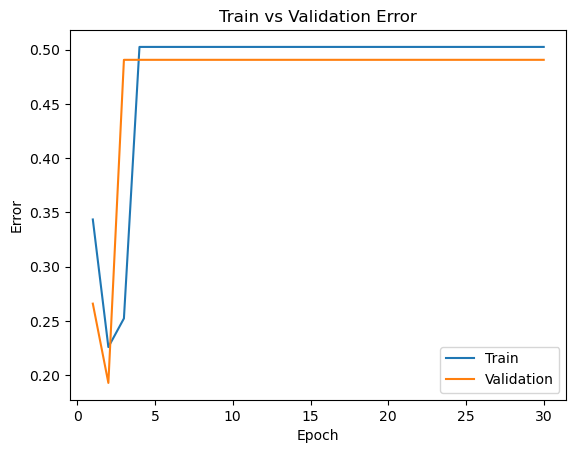

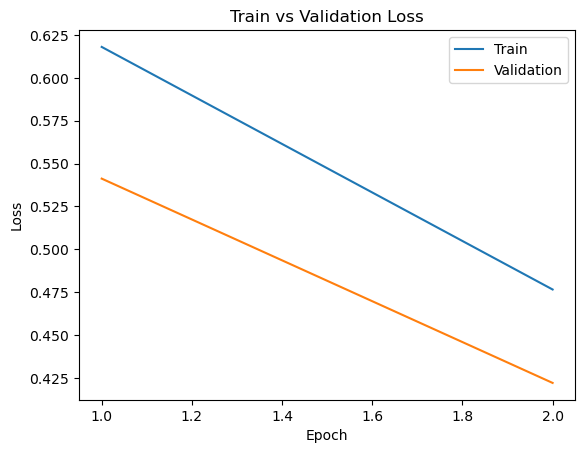

In [107]:
# # Training Curve
# def plot_training_curve2(path):
#     """ Plots the training curve for a model run, given the csv files
#     containing the train/validation error/loss.

#     Args:
#         path: The base path of the csv files produced during training
#     """
#     import matplotlib.pyplot as plt
#     train_err = np.loadtxt("{}_train_err.csv".format(path))
#     val_err = np.loadtxt("{}_val_err.csv".format(path))

#     plt.title("Train vs Validation Error")
#     n = len(train_err) # number of epochs
#     plt.plot(range(1,n+1), train_err, label="Train")
#     plt.plot(range(1,n+1), val_err, label="Validation")
#     plt.xlabel("Epoch")
#     plt.ylabel("Error")
#     plt.legend(loc='best')
#     plt.show()

model_path = get_model_name("large", batch_size=16, learning_rate=.01, epoch=29)
plot_training_curve(model_path)

In [ ]:
'''
The training process takes 601.81 seconds, compared with 481.59s, batch size 512, 517.79s, batch size 64,
the model with smaller batch size takes longer time to train.

The model fails to converge when decreasing batch size to 16, we may guess that 
a small batch size brings too much noises when computing gradients, therefore the model collapses.


'''

## Part 4. Hyperparameter Search

### Part (i) [1pt EXPLORATORY]

Based on the plots from above, choose another set of values for the hyperparameters (network, batch_size, learning_rate)
that you think would help you improve the validation accuracy. Justify your choice.

In [ ]:
'''

From the above research, we found that a low learning rate and large batch size 
leads to a more stable training process, although the training time is long and they need more epoch to converge.

I would induce a model with learning_rate=0.005, batch_size=256, and increase number of epoch to 50 
to provides enough time to converge.



'''

### Part (ii) [0.5pt EXPLORATORY]

Train the model with the hyperparameters you chose in part(i), and include the training curve.

In [109]:
# TO BE COMPLETED
large_net = LargeNet()
train_net(large_net, learning_rate=.005, batch_size=256, num_epochs=50)


Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.497625, Train loss: 0.6934541687369347 |Validation err: 0.5095, Validation loss: 0.6931217759847641
Epoch 2: Train err: 0.49475, Train loss: 0.6909062713384628 |Validation err: 0.49, Validation loss: 0.6905508041381836
Epoch 3: Train err: 0.4335, Train loss: 0.6881144512444735 |Validation err: 0.406, Validation loss: 0.6871424615383148
Epoch 4: Train err: 0.382125, Train loss: 0.6829075142741203 |Validation err: 0.3785, Validation loss: 0.6807336658239365
Epoch 5: Train err: 0.3635, Train loss: 0.6730942223221064 |Validation err: 0.376, Validation loss: 0.666592538356781
Epoch 6: Train err: 0.3595, Train loss: 0.6512426286935806 |Validation err: 0.369, Validation loss: 0.6469900012016296
Epoch 7: Train err: 0.36225, Train loss: 0.6307784374803305 |Validation err: 0.3695, Validation loss: 0.635557197034359
Epoch 8: Train err: 0.352875, Train loss: 0.6211028043180704 |Validation err: 0.3535,

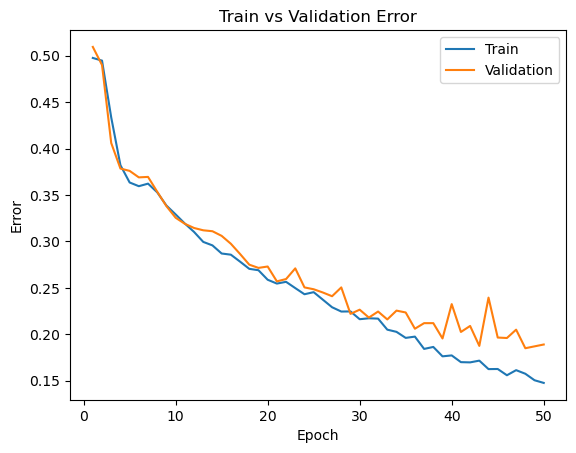

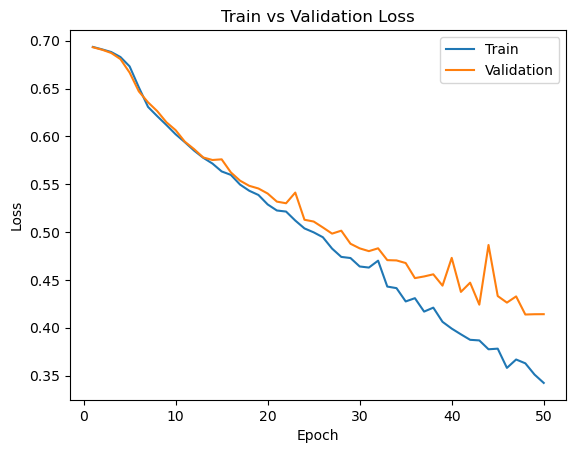

In [110]:
model_path = get_model_name("large", batch_size=256, learning_rate=.005, epoch=49)
plot_training_curve(model_path)

### Part (iii) [1pt EXPLORATORY]
Based on your result from Part(i), suggest another set of hyperparameter values to try.
Justify your choice.

In [ ]:
'''

The model experiences overshotting at about epoch 47, I would lower learning rate and increase number of epoch.

I would suggest a model with learning_rate=0.002, batch_size=256, and increase number of epoch to 100 
to provides enough time to converge.


'''

### Part (iv) [0.5pt EXPLORATORY]

Train the model with the hyperparameters you chose in part(iii), and include the training curve.

In [115]:
# TO BE COMPLETED

large_net = LargeNet()
train_net(large_net, learning_rate=.002, batch_size=256, num_epochs=100)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.5445, Train loss: 0.6942501850426197 |Validation err: 0.531, Validation loss: 0.6936743333935738
Epoch 2: Train err: 0.53275, Train loss: 0.6938919108361006 |Validation err: 0.52, Validation loss: 0.6933278888463974
Epoch 3: Train err: 0.518125, Train loss: 0.6934949979186058 |Validation err: 0.4955, Validation loss: 0.6929254457354546
Epoch 4: Train err: 0.49675, Train loss: 0.6930309161543846 |Validation err: 0.453, Validation loss: 0.692517414689064
Epoch 5: Train err: 0.461375, Train loss: 0.6925232149660587 |Validation err: 0.43, Validation loss: 0.6920007467269897
Epoch 6: Train err: 0.442125, Train loss: 0.6919808927923441 |Validation err: 0.412, Validation loss: 0.6914712861180305
Epoch 7: Train err: 0.419875, Train loss: 0.6912808641791344 |Validation err: 0.401, Validation loss: 0.6907131373882294
Epoch 8: Train err: 0.408875, Train loss: 0.6904369536787271 |Validation err: 0.404

Epoch 68: Train err: 0.167375, Train loss: 0.3865729384124279 |Validation err: 0.171, Validation loss: 0.3982417993247509
Epoch 69: Train err: 0.163, Train loss: 0.3830046420916915 |Validation err: 0.1805, Validation loss: 0.41012905538082123
Epoch 70: Train err: 0.163375, Train loss: 0.382861171849072 |Validation err: 0.174, Validation loss: 0.3953673616051674
Epoch 71: Train err: 0.156125, Train loss: 0.37249896954745054 |Validation err: 0.168, Validation loss: 0.3895602524280548
Epoch 72: Train err: 0.1565, Train loss: 0.3717199070379138 |Validation err: 0.1685, Validation loss: 0.3960350379347801
Epoch 73: Train err: 0.1605, Train loss: 0.37746333703398705 |Validation err: 0.167, Validation loss: 0.39043815061450005
Epoch 74: Train err: 0.154, Train loss: 0.36344042979180813 |Validation err: 0.1585, Validation loss: 0.38248853012919426
Epoch 75: Train err: 0.154125, Train loss: 0.36047768127173185 |Validation err: 0.159, Validation loss: 0.38136478140950203
Epoch 76: Train err: 0.1

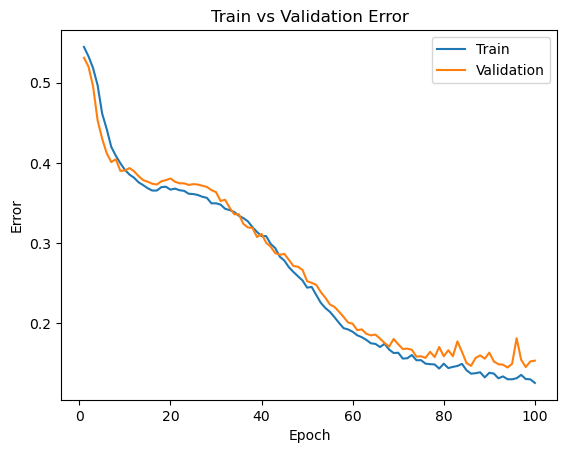

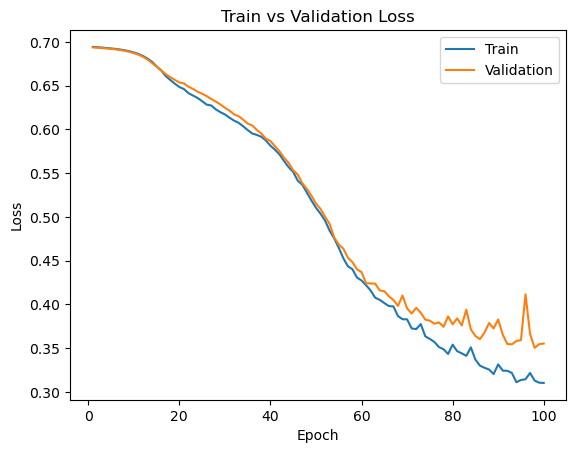

In [117]:
model_path = get_model_name("large", batch_size=256, learning_rate=.002, epoch=99)
plot_training_curve(model_path)

## Part 4. Evaluating the Best Model


### Part (i) [2pt MODEL]

Summarize in a table the results achieved on training and validation on all your model selections. This includes choice of `small_net` vs `large_net`, the `batch_size`, `learning_rate`,
**and the epoch number**. Hint: you can import the Pandas module to create tables.


Then upon reviewing the results choose your **best** model and load the model checkpoint. You can modify the code below to load your chosen set of weights to the model object `net`.

In [15]:
net = large_net
model_path = get_model_name(net.name, batch_size=64, learning_rate=0.01, epoch=16)
state = torch.load(model_path)
net.load_state_dict(state)

<All keys matched successfully>

In [121]:
# TO BE COMPLETED

res_table = pd.DataFrame({'network': ['small', 'large', 'large', 'large', 'large', 'large', 'large', 'large']})
res_table['batch_size']=[64, 64, 64, 64, 512, 16, 256, 256]
res_table['learning_rate']=[0.01, 0.01, 0.001, 0.1, 0.01, 0.01, 0.005, 0.002]
res_table['epoch']=[29, 16, 28, 4, 30, 2, 48, 98]

res_table['training_error']=[0.1486, 0.0908, 0.1745, 0.1824, 0.1801, 0.226, 0.1575, 0.1306]
res_table['training_loss']=[0.3503, 0.2175, 0.4046, 0.4167, 0.4087, 0.4765, 0.3628, 0.3129]
res_table['validation_error']=[0.171, 0.126, 0.184, 0.17, 0.1855, 0.193, 0.185, 0.1455]
res_table['validation_loss']=[0.3846, 0.3274, 0.4143, 0.4152, 0.4209, 0.4220, 0.4138, 0.3503]
res_table

,network,batch_size,learning_rate,epoch,training_error,training_loss,validation_error,validation_loss
0,small,64,0.010,29,0.1486,0.3503,0.1710,0.3846
1,large,64,0.010,16,0.0908,0.2175,0.1260,0.3274
2,large,64,0.001,28,0.1745,0.4046,0.1840,0.4143
3,large,64,0.100,4,0.1824,0.4167,0.1700,0.4152
4,large,512,0.010,30,0.1801,0.4087,0.1855,0.4209
5,large,16,0.010,2,0.2260,0.4765,0.1930,0.4220
6,large,256,0.005,48,0.1575,0.3628,0.1850,0.4138
7,large,256,0.002,98,0.1306,0.3129,0.1455,0.3503


### Part (ii) [4pt DISCUSSION]

Justify your choice of model from Part (i).

In [ ]:
'''

Output summary of 8 networks we tested:

Epoch 29: Train err: 0.148625, Train loss: 0.35033632671833037 |Validation err: 0.171, Validation loss: 0.38455003034323454
Epoch 16: Train err: 0.09075, Train loss: 0.2174989659190178 |Validation err: 0.126, Validation loss: 0.3274385528638959
Epoch 28: Train err: 0.1745, Train loss: 0.40455931997299194 |Validation err: 0.184, Validation loss: 0.4142557019367814
Epoch 4: Train err: 0.182375, Train loss: 0.4166514735221863 |Validation err: 0.17, Validation loss: 0.4151669619604945
Epoch 30: Train err: 0.180125, Train loss: 0.4086633510887623 |Validation err: 0.1855, Validation loss: 0.4209388494491577
Epoch 2: Train err: 0.226, Train loss: 0.4765203329324722 |Validation err: 0.193, Validation loss: 0.4220203506946564
Epoch 48: Train err: 0.1575, Train loss: 0.36284795589745045 |Validation err: 0.185, Validation loss: 0.4138339124619961
Epoch 98: Train err: 0.130625, Train loss: 0.3128896541893482 |Validation err: 0.1455, Validation loss: 0.3503043204545975

Here I choosd the second model of large_net with 64 batchs and 0.01 learning rate, the best performance occurs at
epoch 16, with validation error of 0.12, loss 0.32, which are smaller than the other 7 models. In the learning curve
of this model, we can see the validation loss and error first goes down and then goes up, while training 
loss and error continues to go down. Epoch 16 is chosen when the error reaches the lowest point, which means
that the model fits very well and it's neither overfitted nor underfitted.

'''

### Part (iii) [4pt RESULT]

Using the helper code in Part 0, any code from lecture notes, or any code that you write, compute and report the **test classification error** for your chosen model.

In [124]:
# If you use the `evaluate` function provided in part 0, you will need to
# set batch_size > 1
train_loader, val_loader, test_loader, classes = get_data_loader(
    target_classes=["car", "truck"],
    batch_size=64)

Files already downloaded and verified
Files already downloaded and verified


In [128]:
# TO BE COMPLETED

test_error, test_loss = evaluate(net, test_loader, criterion = nn.BCEWithLogitsLoss())

print("Test classification error is:",test_error*100,'%')


Test classification error is: 14.799999999999999 %


### Part (iv) [3pt DISCUSSION]

How does the test classification error compare with the **validation error**?
Explain why you would expect the test error to be *higher* than the validation error.

In [129]:
val_error, val_loss = evaluate(net, val_loader, criterion = nn.BCEWithLogitsLoss())

print("Validation error is:",val_error*100,'%')

Validation error is: 15.4 %


In [ ]:
'''

In real practice, we use training set to train our model and validation set for hyperparameter tuning, 
then we use test set to evaluate our model performance. We would expect lower error on validation
set because we use the dataset to tune our parameters, theoretically, the resulted parameters behaves the best
on our valildation dataset, but it's not guarantee on the test dataset.

'''

### Part (v) [3pt DISCUSSION]
Why did we only use the test data set at the very end?
Why is it important that we use the test data as little as possible?

In [ ]:
'''
In machine learning processes, we only use test data at the very end to evaluate our model performance. Train data
is used to build and train the model, while validation data is used for hyperparameter tuning, train data and 
validation data are used to build a model that best fits the situation. Firstly, if the model sees test data
in training processess, it may overfit on the test data, this can leads to decrease on generalization of the model.
Secondly, We want to make sure that test data only used at the end because we want to have an accurate estimate 
on our model performance. So that we can know how the model performs on new and unkowned real world data.


We use test data as little as possible because we may want to unsure that there's enough training and validation 
data when we build the model.
As long as the test data is realistic, valid, and it's a good representative of real world situations, 
we can have a good evaluation on model performance, even if test data is small.

'''

## Part 5. Fully-Connected Linear ANN vs CNN [4pt RESULT]

Test out a 3-layer linear fully-connected ANN architecture (see simpleANN below). You should explore different hyperparameter settings to determine how well you can do on the validation dataset. Once satisified with the performance, you may test it out on the test data.

How does the your best CNN model compare with an 2-layer linear ANN model (no convolutional layers) on classifying car and truck images?

In [18]:
class simpleANN(nn.Module):
    def __init__(self):
        super(simpleANN, self).__init__()
        self.name = "simple"
        self.fc1 = nn.Linear(32*32*3, 100)
        self.fc2 = nn.Linear(100, 20)
        self.fc3 = nn.Linear(20, 1)

    def forward(self, x):
        x = x.view(-1, 32*32*3)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

**Try out default training**

In [19]:
# Try out default training

three_net = simpleANN()
train_net(three_net)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.34275, Train loss: 0.6207513751983642 |Validation err: 0.312, Validation loss: 0.5979004949331284
Epoch 2: Train err: 0.27275, Train loss: 0.5474738521575928 |Validation err: 0.272, Validation loss: 0.5455283261835575
Epoch 3: Train err: 0.23775, Train loss: 0.49674709486961366 |Validation err: 0.2535, Validation loss: 0.5237214136868715
Epoch 4: Train err: 0.218625, Train loss: 0.46652347803115846 |Validation err: 0.2645, Validation loss: 0.5256246468052268
Epoch 5: Train err: 0.198, Train loss: 0.4321171798706055 |Validation err: 0.2585, Validation loss: 0.5319663221016526
Epoch 6: Train err: 0.17775, Train loss: 0.4010763386487961 |Validation err: 0.25, Validation loss: 0.5406360095366836
Epoch 7: Train err: 0.161875, Train loss: 0.3659945398569107 |Validation err: 0.2455, Validation loss: 0.5461867349222302
Epoch 8: Train err: 0.139, Train loss: 0.33435597705841064 |Validation err: 0.2

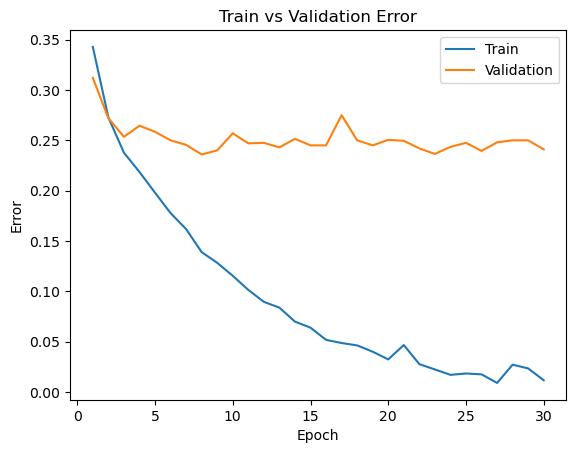

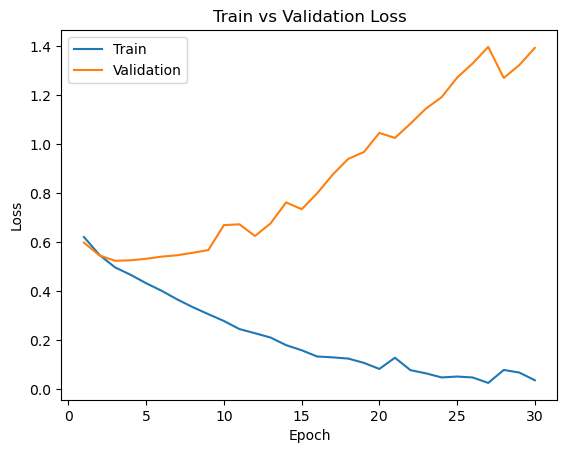

In [20]:
model_path = get_model_name("simple", batch_size=64, learning_rate=.01, epoch=29)
plot_training_curve(model_path)

In [ ]:
# Epoch 3: Train err: 0.23775, Train loss: 0.49674709486961366 |Validation err: 0.2535, Validation loss: 0.52372141

**lower learning rate**

In [21]:
# lower learning rate
three_net = simpleANN()
train_net(three_net, learning_rate=0.001)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.4565, Train loss: 0.6812658319473267 |Validation err: 0.382, Validation loss: 0.660333963111043
Epoch 2: Train err: 0.350375, Train loss: 0.6368848538398743 |Validation err: 0.352, Validation loss: 0.628448249772191
Epoch 3: Train err: 0.327125, Train loss: 0.6101907315254211 |Validation err: 0.3295, Validation loss: 0.6098903371021152
Epoch 4: Train err: 0.30925, Train loss: 0.5932393765449524 |Validation err: 0.312, Validation loss: 0.5974772125482559
Epoch 5: Train err: 0.296625, Train loss: 0.5775851485729218 |Validation err: 0.3075, Validation loss: 0.5878970678895712
Epoch 6: Train err: 0.281375, Train loss: 0.5625726175308228 |Validation err: 0.291, Validation loss: 0.5763725461438298
Epoch 7: Train err: 0.27, Train loss: 0.5474849171638488 |Validation err: 0.289, Validation loss: 0.5695346426218748
Epoch 8: Train err: 0.260125, Train loss: 0.5336883361339569 |Validation err: 0.2775

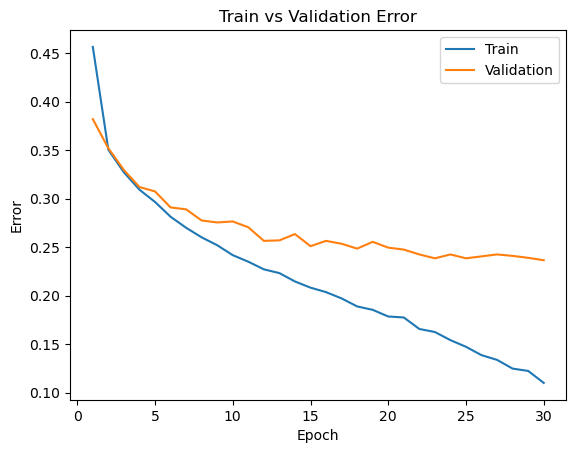

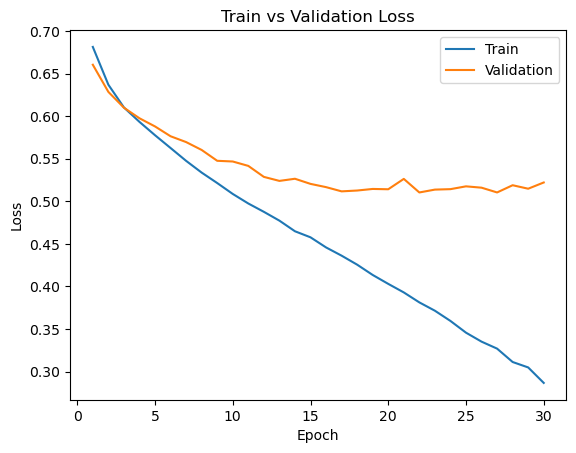

In [22]:
# lower learning rate
model_path = get_model_name("simple", batch_size=64, learning_rate=.001, epoch=29)
plot_training_curve(model_path)

In [ ]:
# Epoch 22: Train err: 0.165625, Train loss: 0.3812895493507385 |Validation err: 0.2425, Validation loss: 0.510368537157774

**Increase batch size and epoch**

In [25]:
# increase batch size and epoch
three_net = simpleANN()
train_net(three_net, learning_rate=0.001,  batch_size=512, num_epochs=120)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.445625, Train loss: 0.6899442635476589 |Validation err: 0.426, Validation loss: 0.6889497637748718
Epoch 2: Train err: 0.398375, Train loss: 0.6851665154099464 |Validation err: 0.3855, Validation loss: 0.6837389916181564
Epoch 3: Train err: 0.370875, Train loss: 0.6798126399517059 |Validation err: 0.377, Validation loss: 0.6785204708576202
Epoch 4: Train err: 0.36375, Train loss: 0.6744621992111206 |Validation err: 0.37, Validation loss: 0.6735616624355316
Epoch 5: Train err: 0.3585, Train loss: 0.6693677678704262 |Validation err: 0.367, Validation loss: 0.6680572181940079
Epoch 6: Train err: 0.354, Train loss: 0.6637372337281704 |Validation err: 0.361, Validation loss: 0.662995234131813
Epoch 7: Train err: 0.35125, Train loss: 0.6583476848900318 |Validation err: 0.36, Validation loss: 0.6577268242835999
Epoch 8: Train err: 0.34925, Train loss: 0.6530513241887093 |Validation err: 0.36, Val

Epoch 68: Train err: 0.26025, Train loss: 0.5285835526883602 |Validation err: 0.278, Validation loss: 0.5610555559396744
Epoch 69: Train err: 0.259375, Train loss: 0.5273909159004688 |Validation err: 0.276, Validation loss: 0.5607336759567261
Epoch 70: Train err: 0.256875, Train loss: 0.5256979539990425 |Validation err: 0.2765, Validation loss: 0.559549480676651
Epoch 71: Train err: 0.256, Train loss: 0.5242735985666513 |Validation err: 0.2755, Validation loss: 0.5589080154895782
Epoch 72: Train err: 0.2555, Train loss: 0.5225397571921349 |Validation err: 0.275, Validation loss: 0.5572789460420609
Epoch 73: Train err: 0.2545, Train loss: 0.521414564922452 |Validation err: 0.2755, Validation loss: 0.5567668825387955
Epoch 74: Train err: 0.25375, Train loss: 0.5179365426301956 |Validation err: 0.275, Validation loss: 0.5549239814281464
Epoch 75: Train err: 0.25175, Train loss: 0.5173935778439045 |Validation err: 0.277, Validation loss: 0.5533258616924286
Epoch 76: Train err: 0.251625, Tr

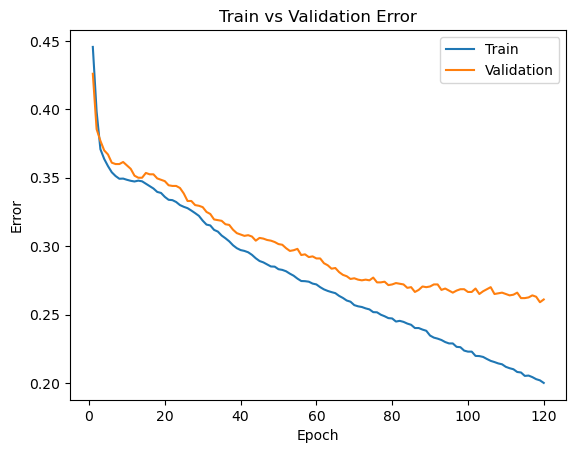

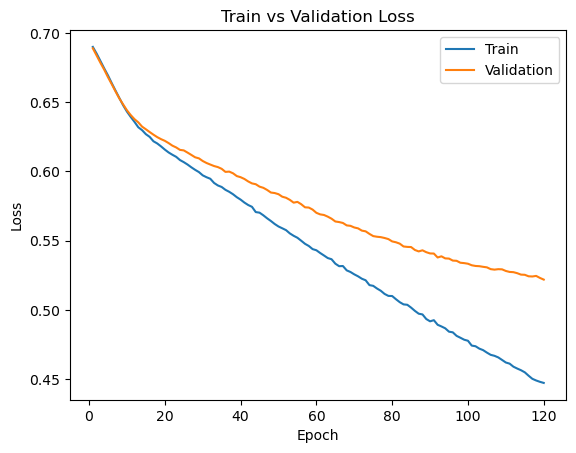

In [26]:
model_path = get_model_name("simple", batch_size=512, learning_rate=.001, epoch=119)
plot_training_curve(model_path)

In [ ]:
#Epoch 119: Train err: 0.201875, Train loss: 0.4480821806937456 |Validation err: 0.259, Validation loss: 0.5231219679117203

In [28]:
net = three_net
model_path = get_model_name(net.name, batch_size=64, learning_rate=0.001, epoch=22)
state = torch.load(model_path)
net.load_state_dict(state)

<All keys matched successfully>

In [29]:
train_loader, val_loader, test_loader, classes = get_data_loader(
    target_classes=["car", "truck"],
    batch_size=64)
test_error, test_loss = evaluate(net, test_loader, criterion = nn.BCEWithLogitsLoss())

print("Test classification error is:",test_error*100,'%')

Files already downloaded and verified
Files already downloaded and verified
Test classification error is: 25.05 %


In [ ]:
'''

I first try out default training on simpleANN, from the loss curve, we can see that training loss decreases,
while validation loss first decrease then increase, it is possible that the model is training too fast,
and it's overfitting. So I test it out with a smaller learning rate 0.001.

The new training curve becomes more stable, validation loss decreases and turns flat, there's not sign of 
overfitting, while the lowest error and loss are very similar to the last one.
From the last part on training 2 layer network, we found that increasing batch size decrease speed of convergence, 
and it lowers noises on learning curve, so I choose a higher batch size of 512, and increse epoch to 120
for the errors to reach its minimum.

Error of the third model is also similar to the first two, while the best model is the second one with learning 
rate 0.01, it provides Validation err: 0.2425, Validation loss: 0.510368537157774.

Testing out the second network on test dataset, resulted error is 25%, which is higher than best CNN model 
in the last part, which was 15%. 


'''

In [ ]:
class SimpleLarge(nn.Module):
    def __init__(self):
        super(LargeNet, self).__init__()
        self.name = "slarge"
        self.fc1 = nn.Linear(10 * 5 * 5, 32)
        self.fc2 = nn.Linear(32, 1)

    def forward(self, x):
        x = x.view(-1, 10 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

In [ ]:
simple_large = SimpleLarge()

# PART C (Optional) - Bonus Challenge!

This is an optional exercise for those that finish the assignment early and would like to perform a deeper exploration of the assignment.

In part A we constructed and trained a 2-layer neural network from scratch. In Part B we saw how PyTorch can be used to simplify the construction of neural networks by taking care of all the complexity related to gradient calculations, training on GPUs, and structuring your code.

For this bonus challenge we will propose additional task that will have you work towards completing the pipeline and deploying the models online, while exploring ways to improve these models along the way.

Tasks:

1. Modify your code to classify images that are not cars or trucks into the category "other".
2. Preprocess images from the internet to be able to classify any images into cars and trucks (i.e., resize, aspect ratio, etc.). Evaluate your best model's performance on images loaded from the internet.
3. Deploy your best model onto huggingface spaces (or other web hosting services) to classify images into cars, trucks, and "other" if you've completed task 1.

Bonus marks will be provided based on the number of tasks completed and how well they are completed. Summarize below your results and anything intersting you learned from the steps that you completed. Bonus marks cannot be accumulated beyond a maximum assignment grade.

### Task 1
I modified get_data_loader to load data from resource, different from get_data_loader, the new function loads data of all 10 classes, and classifies them into 'car', 'truck', 'other'

In [7]:
def assign_idx(classes):
    """ 
    Helper function to modify target classes into 'car', 'truck', 'other'
    Assign car=0, truck=1, any classes other than car and truck to 2
    """
    if classes == 'car':
        return 0
    elif classes == 'truck':
        return 1
    else:
        return 2

In [9]:
def get_data_loader2(target_classes, batch_size):
    """ 
    This is a modified function for multi-class classification.
    Different from get_data_loader, this function loads all the data, 
    and classifies them into 'car', 'truck', 'other'
    """

    # Define new classes type 
    classes = ['car', 'truck', 'other']
    # Original classes
    ori_class = ['plane', 'car', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    ########################################################################
    # The output of torchvision datasets are PILImage images of range [0, 1].
    # We transform them to Tensors of normalized range [-1, 1].
    transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    # Load CIFAR10 training data
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    
    # Put classes other than car or truck into 'other'
    for idx, (_, label) in enumerate(trainset):
        if ori_class[label] not in target_classes:
            trainset.targets[idx] = assign_idx('other')
    
    # Want to load all indices
    relevant_indices = list(range(len(trainset)))

    # Split into train and validation
    np.random.seed(1000) # Fixed numpy random seed for reproducible shuffling
    np.random.shuffle(relevant_indices)
    split = int(len(relevant_indices) * 0.8) #split at 80%

    # split into training and validation indices
    relevant_train_indices, relevant_val_indices = relevant_indices[:split], relevant_indices[split:]
    train_sampler = SubsetRandomSampler(relevant_train_indices)
    train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                               num_workers=1, sampler=train_sampler)
    val_sampler = SubsetRandomSampler(relevant_val_indices)
    val_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                              num_workers=1, sampler=val_sampler)
    # Load CIFAR10 testing data
    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transform)
    
    # Put classes other than car or truck into 'other'
    for idx, (_, label) in enumerate(testset):
        if ori_class[label] not in target_classes:
            testset.targets[idx] = assign_idx('other')
    
    # Want to load all indices
    relevant_test_indices = list(range(len(testset)))
    test_sampler = SubsetRandomSampler(relevant_test_indices)
    test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                             num_workers=1, sampler=test_sampler)
    return train_loader, val_loader, test_loader, classes

### Task 2
With get_data_loader2, I can load the dataset as multi-class: other than "car" and "truck", the other classes are categorized as "other". Then the best model from the last part is used for evaluation.

In [16]:

# Define target classes 
target_classes = ["car", "truck"]

# Get data loaders for all classes
train_loader, val_loader, test_loader, classes = get_data_loader2(
    target_classes=target_classes,
    batch_size=64)

test_error, test_loss = evaluate(net, test_loader, criterion = nn.CrossEntropyLoss())

print("Test classification error is:",test_error*100,'%')


Files already downloaded and verified
Files already downloaded and verified
Test classification error is: 82.96 %


Files already downloaded and verified
Files already downloaded and verified
tensor([2])
tensor([2])
tensor([1])
tensor([9])
tensor([2])
tensor([2])
tensor([2])
tensor([2])
tensor([9])
tensor([2])
tensor([2])
tensor([2])
tensor([2])
tensor([9])
tensor([2])


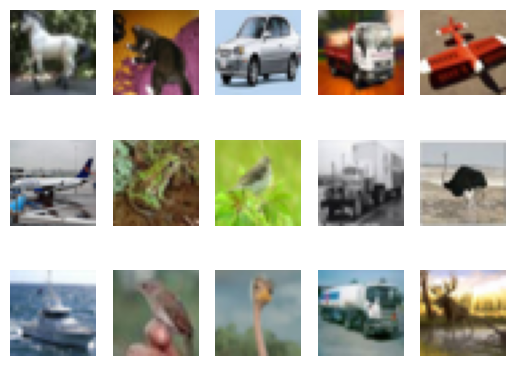

In [32]:
train_loader, val_loader, test_loader, classes = get_data_loader2(
    target_classes=target_classes,
    batch_size=1)

import matplotlib.pyplot as plt

k = 0
for images, labels in train_loader:
    print(labels)
    # since batch_size = 1, there is only 1 image in `images`
    image = images[0]
    # place the colour channel at the end, instead of at the beginning
    img = np.transpose(image, [1,2,0])
    # normalize pixel intensity values to [0, 1]
    img = img / 2 + 0.5
    plt.subplot(3, 5, k+1)
    plt.axis('off')
    plt.imshow(img)

    k += 1
    if k > 14:
        break

In [ ]:
'''
Task 1
I modified get_data_loader to load data from resource, different from get_data_loader, 
the new function loads data of all 10 classes, and classifies them into 'car', 'truck', 'other'

Task 2
With get_data_loader2, I can load the dataset as multi-class: other than "car" and "truck", 
the other classes are categorized as "other". Then the best model from the last part is used for evaluation.

'''

### Saving to HTML
Detailed instructions for saving to HTML can be found <a href="https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab/64487858#64487858">here</a>. Provided below are a summary of the instructions:

(1) download your ipynb file by clicking on File->Download.ipynb

(2) reupload your file to the temporary Google Colab storage (you can access the temporary storage from the tab to the left)

(3) run the following:

In [ ]:
%%shell
jupyter nbconvert --to html A1_PyTorch_Introduction.ipynb

(4) the html file will be available for download in the temporary Google Colab storage

(5) review the html file and make sure all the results are visible before submitting your assignment to Quercus

# Assignment Grading Rubric
The grading of the assignment will be based on the following categories:

(1) **10 Pt - EXPLORATORY QUESTIONS** These are basic questions that in most cases can be answered without requiring a fully working and trained neural network model. For example, data loading, processing and visualization, summary statistics, data exploration, model and training setup, etc.

(2) **10 Pt - MODEL** Student has successfully implemented all the required neural network models and has demonstrated successful training of the model without any errors.

(3) **10 Pt - RESULT** Students are evaluated based on the results achieved in comparison to the expected results of the assignment.

(4) **10 Pt - DISCUSSION QUESTIONS** Student demonstrated understanding beyond the basic exploratory questions, can answer some of the more challenging questions, and provide arguments for their model selection decisions.

(5) **10 Pt - COMMUNICATION** Student has provided a quality submission that is easy to read without too many unnecessary output statements that distract the reading of the document. The code has been well commented and all the answers are communicated clearly and concisely.

(6) **10 Pt - BONUS** Student has completed the assignment and has taken on the challenging bonus tasks listed in PART C. The student has demonstrated a good understanding of all aspects of the assignment and has exceeded expectations for the assignment.



**TOTAL GRADE = _____ of 50 Pts**